In [1914]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_squared_log_error

In [1953]:
df = pd.read_csv('/Users/PRAKASH RANJAN/Desktop/Proj_D0/Regression/Regression/Car_resale_price.csv')

In [1954]:
df.shape

(4340, 8)

#  EXPLORATORY DATA ANALYSIS

In [1955]:
df.info()
#There are no null values as such for any field in this dataset as shown by above output.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_Name       4340 non-null   object
 1   Year           4340 non-null   int64 
 2   Selling_Price  4340 non-null   int64 
 3   Kms_Driven     4340 non-null   int64 
 4   Fuel_Type      4340 non-null   object
 5   Seller_Type    4340 non-null   object
 6   Transmission   4340 non-null   object
 7   Owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [1956]:
# Further confirmation of absence of NULL values.
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [1957]:
df.head()

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [1958]:
# Looking for Unique values for each field in the dataset.
df.nunique()

Car_Name         1491
Year               29
Selling_Price     445
Kms_Driven        770
Fuel_Type           5
Seller_Type         3
Transmission        2
Owner               5
dtype: int64

In [1959]:
# To describe the data types of each Column.
df.dtypes

Car_Name         object
Year              int64
Selling_Price     int64
Kms_Driven        int64
Fuel_Type        object
Seller_Type      object
Transmission     object
Owner            object
dtype: object

# Value count for categorical data.

In [1960]:
# Displaying non-numerical features
df.select_dtypes(exclude="number").head()

,Car_Name,Fuel_Type,Seller_Type,Transmission,Owner
0,Maruti 800 AC,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Diesel,Individual,Manual,Second Owner


In [1961]:
# Describing non-numerical features
df.describe(exclude="number").head()
# Car_Name field has got many unique values.

,Car_Name,Fuel_Type,Seller_Type,Transmission,Owner
count,4340,4340,4340,4340,4340
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,69,2149,3244,3892,2833


In [1962]:
print(df['Car_Name'].nunique())
print(df['Car_Name'].value_counts())

1491
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: Car_Name, Length: 1491, dtype: int64


In [1963]:
df['Fuel_Type'].value_counts()

Diesel      2149
Petrol      2122
CNG           40
LPG           23
Electric       6
Name: Fuel_Type, dtype: int64

In [1964]:
df['Seller_Type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: Seller_Type, dtype: int64

In [1965]:
df['Transmission'].value_counts()

Manual       3892
Automatic     448
Name: Transmission, dtype: int64

In [1966]:
df['Owner'].value_counts()

First Owner             2833
Second Owner            1106
Third Owner              303
Fourth & Above Owner      81
Test Drive Car            17
Name: Owner, dtype: int64

## Les's draw histogram to understand Numerical variable

In [1967]:
# To describe the numerical fields in the dataset.
df.describe()
# Looks like Kms_Driven field has got larger range of values.

,Year,Selling_Price,Kms_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.096774,5.043381e+05,66195.040092
std,4.215757,5.785445e+05,46649.084846
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.100000e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2022.000000,8.900000e+06,806599.000000


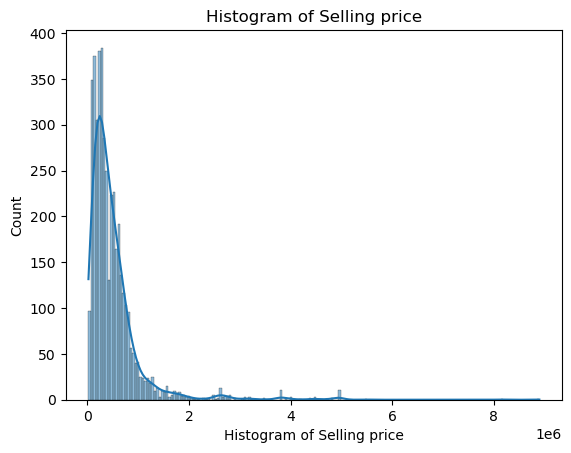

In [1968]:
sns.histplot(data=df, x='Selling_Price', kde=True)

# To set plot title and labels
plt.title('Histogram of Selling price')
plt.xlabel('Histogram of Selling price')
plt.ylabel('Count')

# To display the plot
plt.show()

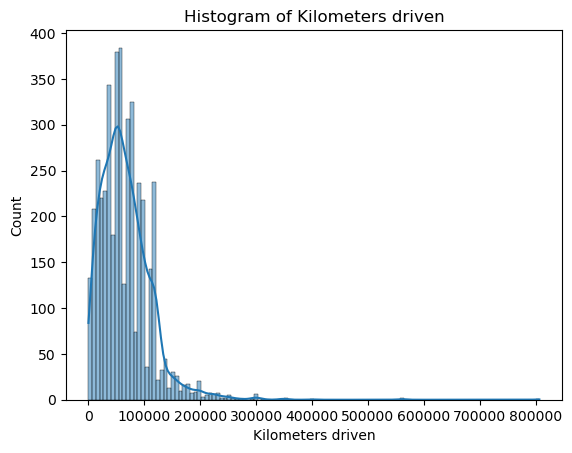

In [1969]:
sns.histplot(data=df, x='Kms_Driven', kde=True)

# To set plot title and labels
plt.title('Histogram of Kilometers driven')
plt.xlabel('Kilometers driven')
plt.ylabel('Count')

# To display the plot
plt.show()

In [1970]:
df.corr()

,Year,Selling_Price,Kms_Driven
Year,1.000000,0.413963,-0.419624
Selling_Price,0.413963,1.000000,-0.192348
Kms_Driven,-0.419624,-0.192348,1.000000


## Feature construction.

In [1971]:
# EXTRACTING THE AGE OF CAR FROM GIVEN RESPECTIVE YEARS.
current_year=2023

In [1972]:
df['Car_age']=current_year-df['Year']
df

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,16
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,16
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,11
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,9
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,9
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,9
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,14
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,7


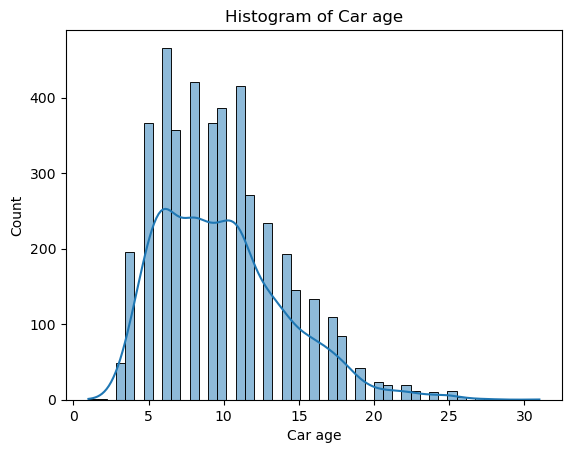

In [1973]:
sns.histplot(data=df, x='Car_age', kde=True)

# To set plot title and labels
plt.title('Histogram of Car age')
plt.xlabel('Car age')
plt.ylabel('Count')

# To display the plot
plt.show()

In [1974]:
# EXTRACTING BRAND OF THE CAR
df['Car_Brand']=df.Car_Name.str.split(n=1).str[0]
df

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age,Car_Brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,16,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,16,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,11,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,6,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,9,Honda
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,9,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,9,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,14,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,7,Hyundai


In [1975]:
df['Car_Brand'].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: Car_Brand, dtype: int64

In [1976]:
df['Car_Brand'].nunique()

29

In [1977]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Car_age', 'Car_Brand'],
      dtype='object')

# Treatment of outliers for Numerical variable

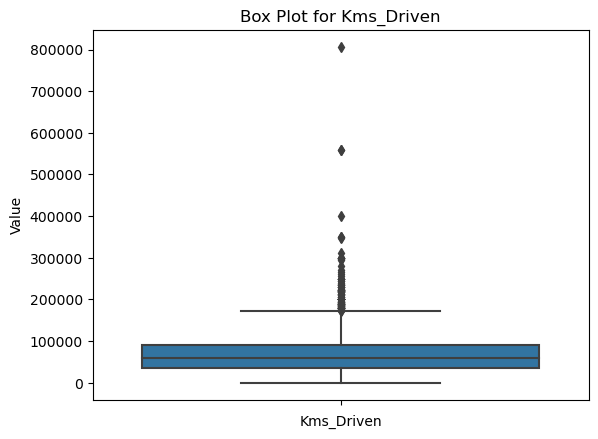

In [1978]:
# Box plot for Kms_Driven
sns.boxplot(data=df, y='Kms_Driven')

# To set plot title and labels
plt.title('Box Plot for Kms_Driven')
plt.xlabel('Kms_Driven')
plt.ylabel('Value')

# To display the plot
plt.show()

In [1979]:
# Outlier detection for Kms_Driven.
q1 = df['Kms_Driven'].quantile(0.25)
q3 = df['Kms_Driven'].quantile(0.75)

# Calculate interquartile range (IQR)
iqr = q3 - q1

# Calculate lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers and number of them.
outliers = df[(df['Kms_Driven'] < lower_bound) | (df['Kms_Driven'] > upper_bound)]

# Print the results
print("Quartile 1 (Q1):", q1)
print("Quartile 3 (Q3):", q3)
print("Interquartile Range (IQR):", iqr)
print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)
print("Number of Outliers:", len(outliers))

Quartile 1 (Q1): 35000.0
Quartile 3 (Q3): 90000.0
Interquartile Range (IQR): 55000.0
Lower Bound for Outliers: -47500.0
Upper Bound for Outliers: 172500.0
Number of Outliers: 110


In [1980]:
df['Kms_Driven']=df['Kms_Driven'].clip(101,172500)
##The clip() function is a convenient method in pandas that limits the values of a Series or DataFrame column 
##to a specified range. In this case, it is applied to the 'loanamount' column.
##Any values in the 'loanamount' column that are less than 100 will be set to 100, and any values greater than 
##200 will be set to 200. This operation ensures that all values in the 'loanamount' column fall within the 
##specified range.

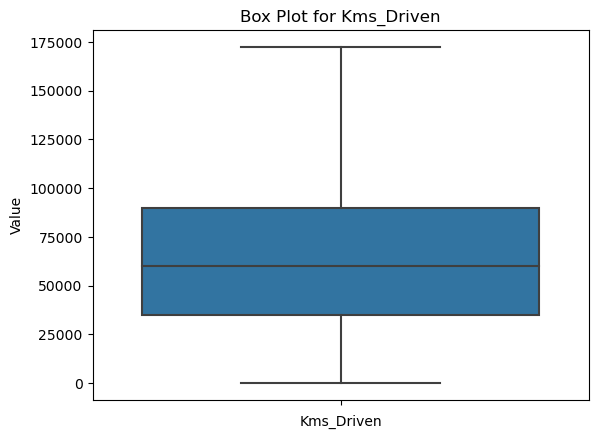

In [1981]:
# Box plot for Kms_Driven post outlier removal
sns.boxplot(data=df, y='Kms_Driven')

# To set plot title and labels
plt.title('Box Plot for Kms_Driven')
plt.xlabel('Kms_Driven')
plt.ylabel('Value')

# To display the plot
plt.show()

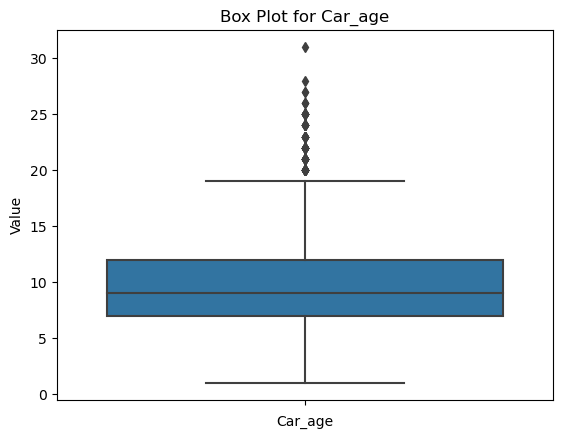

In [1982]:
# Box plot for Car_age

sns.boxplot(data=df, y='Car_age')

# To set plot title and labels
plt.title('Box Plot for Car_age')
plt.xlabel('Car_age')
plt.ylabel('Value')

# To display the plot
plt.show()

In [1983]:
# Outlier detection for Car_age.
q1 = df['Car_age'].quantile(0.25)
q3 = df['Car_age'].quantile(0.75)

# Calculate interquartile range (IQR)
iqr = q3 - q1

# Calculate lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers and number of them.
outliers = df[(df['Car_age'] < lower_bound) | (df['Car_age'] > upper_bound)]

# Print the results
print("Quartile 1 (Q1):", q1)
print("Quartile 3 (Q3):", q3)
print("Interquartile Range (IQR):", iqr)
print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)
print("Number of Outliers:", len(outliers))

Quartile 1 (Q1): 7.0
Quartile 3 (Q3): 12.0
Interquartile Range (IQR): 5.0
Lower Bound for Outliers: -0.5
Upper Bound for Outliers: 19.5
Number of Outliers: 104


In [1984]:
df['Car_age']=df['Car_age'].clip(4,19)

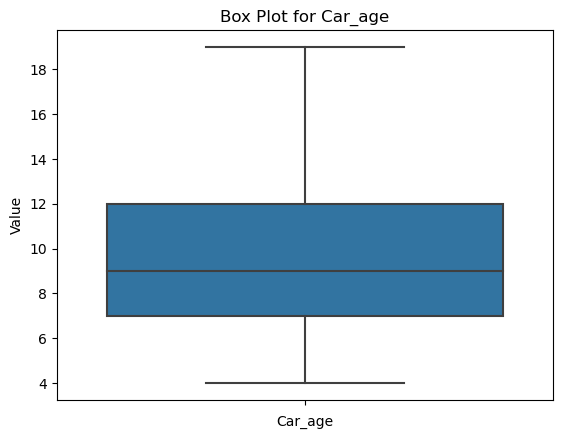

In [1985]:
# Box plot for Car_age post outlier removal.
sns.boxplot(data=df, y='Car_age')

# To set plot title and labels
plt.title('Box Plot for Car_age')
plt.xlabel('Car_age')
plt.ylabel('Value')

# To display the plot
plt.show()

In [1986]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Car_age', 'Car_Brand'],
      dtype='object')

In [1987]:
# Dropping Car_Name and Year fields.
df.drop(['Year'], axis =1, inplace = True)
df.drop(['Car_Name'], axis =1, inplace = True)
df.columns

Index(['Selling_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner', 'Car_age', 'Car_Brand'],
      dtype='object')

In [1988]:
#Pairplot to find the relation between different variables.

dff = df[['Selling_Price','Car_Brand', 'Car_age', 'Kms_Driven', 'Fuel_Type','Seller_Type', 'Transmission', 'Owner']]
fig_pairplot = px.scatter_matrix(dff, height=1000,title= 'Correlation between different fields for whole Data')  
fig_pairplot

In [1989]:
df.corr()

,Selling_Price,Kms_Driven,Car_age
Selling_Price,1.000000,-0.216766,-0.424470
Kms_Driven,-0.216766,1.000000,0.486253
Car_age,-0.424470,0.486253,1.000000


In [1990]:
df.isna().sum()
# No NULL values are there.

Selling_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Car_age          0
Car_Brand        0
dtype: int64

In [1991]:
df.shape

(4340, 8)

In [1992]:
df.columns

Index(['Selling_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner', 'Car_age', 'Car_Brand'],
      dtype='object')

In [1993]:
df

,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age,Car_Brand
0,60000,70000,Petrol,Individual,Manual,First Owner,16,Maruti
1,135000,50000,Petrol,Individual,Manual,First Owner,16,Maruti
2,600000,100000,Diesel,Individual,Manual,First Owner,11,Hyundai
3,250000,46000,Petrol,Individual,Manual,First Owner,6,Datsun
4,450000,141000,Diesel,Individual,Manual,Second Owner,9,Honda
...,...,...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner,9,Hyundai
4336,409999,80000,Diesel,Individual,Manual,Second Owner,9,Hyundai
4337,110000,83000,Petrol,Individual,Manual,Second Owner,14,Maruti
4338,865000,90000,Diesel,Individual,Manual,First Owner,7,Hyundai


# Applying different correlations

In [1994]:
#Cramer's V
! pip install association_metrics
import association_metrics as am
data=df.apply(lambda x : x.astype("category") if x.dtype=="O" else x)
cramers_v=am.CramersV(data)
cfit=cramers_v.fit().round(2)
cfit


,Fuel_Type,Seller_Type,Transmission,Owner,Car_Brand
Fuel_Type,1.00,0.04,0.07,0.03,0.28
Seller_Type,0.04,1.00,0.21,0.21,0.24
Transmission,0.07,0.21,1.00,0.09,0.58
Owner,0.03,0.21,0.09,1.00,0.14
Car_Brand,0.28,0.24,0.58,0.14,1.00


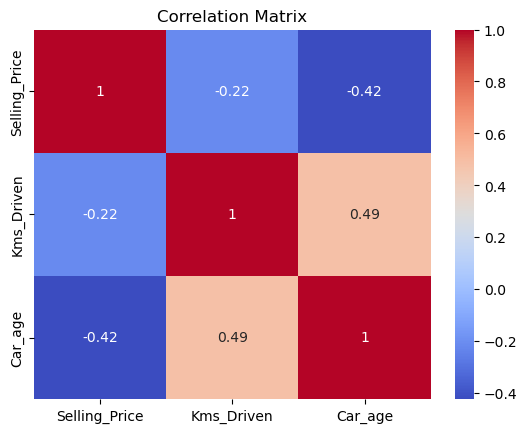

In [1995]:
# Creating a correlation matrix heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [1996]:
import plotly.graph_objects as go
corr = df[['Selling_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Car_age', 'Car_Brand']].corr()
fig = px.imshow(corr, text_auto=True)
fig.update_layout(title_text="Correlation Plot")
fig.show()

# Spearman Correlation

In [1997]:
df.corr(method='spearman')

,Selling_Price,Kms_Driven,Car_age
Selling_Price,1.000000,-0.324119,-0.696034
Kms_Driven,-0.324119,1.000000,0.568774
Car_age,-0.696034,0.568774,1.000000


In [1998]:
df.columns

Index(['Selling_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner', 'Car_age', 'Car_Brand'],
      dtype='object')

In [1999]:
df

,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age,Car_Brand
0,60000,70000,Petrol,Individual,Manual,First Owner,16,Maruti
1,135000,50000,Petrol,Individual,Manual,First Owner,16,Maruti
2,600000,100000,Diesel,Individual,Manual,First Owner,11,Hyundai
3,250000,46000,Petrol,Individual,Manual,First Owner,6,Datsun
4,450000,141000,Diesel,Individual,Manual,Second Owner,9,Honda
...,...,...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner,9,Hyundai
4336,409999,80000,Diesel,Individual,Manual,Second Owner,9,Hyundai
4337,110000,83000,Petrol,Individual,Manual,Second Owner,14,Maruti
4338,865000,90000,Diesel,Individual,Manual,First Owner,7,Hyundai


In [2000]:
df1 = df.copy()
df1

,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age,Car_Brand
0,60000,70000,Petrol,Individual,Manual,First Owner,16,Maruti
1,135000,50000,Petrol,Individual,Manual,First Owner,16,Maruti
2,600000,100000,Diesel,Individual,Manual,First Owner,11,Hyundai
3,250000,46000,Petrol,Individual,Manual,First Owner,6,Datsun
4,450000,141000,Diesel,Individual,Manual,Second Owner,9,Honda
...,...,...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner,9,Hyundai
4336,409999,80000,Diesel,Individual,Manual,Second Owner,9,Hyundai
4337,110000,83000,Petrol,Individual,Manual,Second Owner,14,Maruti
4338,865000,90000,Diesel,Individual,Manual,First Owner,7,Hyundai


In [2001]:
df1.shape

(4340, 8)

# VIF

In [2002]:
df3 = df.copy()
df3.head()

,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age,Car_Brand
0,60000,70000,Petrol,Individual,Manual,First Owner,16,Maruti
1,135000,50000,Petrol,Individual,Manual,First Owner,16,Maruti
2,600000,100000,Diesel,Individual,Manual,First Owner,11,Hyundai
3,250000,46000,Petrol,Individual,Manual,First Owner,6,Datsun
4,450000,141000,Diesel,Individual,Manual,Second Owner,9,Honda


In [2003]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
# Encode labels
df3['Fuel_Type']= label_encoder.fit_transform(df3['Fuel_Type'])
df3['Transmission'] = label_encoder.fit_transform(df3['Transmission'])
df3['Seller_Type'] = label_encoder.fit_transform(df3['Seller_Type'])
df3['Owner'] = label_encoder.fit_transform(df3['Owner'])
df3['Car_age'] = label_encoder.fit_transform(df3['Car_age'])
df3['Car_Brand'] = label_encoder.fit_transform(df3['Car_Brand'])

In [2004]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

a,b = dmatrices('Selling_Price ~ Kms_Driven + Fuel_Type + Seller_Type + Transmission + Owner + Car_age + Car_Brand', data=df3, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['variable'] = b.columns

vif

,VIF,variable
0,19.988810,Intercept
1,1.665857,Kms_Driven
2,1.252282,Fuel_Type
3,1.085100,Seller_Type
4,1.063286,Transmission
5,1.271295,Owner
6,1.613300,Car_age
7,1.049588,Car_Brand


In [2005]:
df3.corr(method='spearman')

,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age,Car_Brand
Selling_Price,1.000000,-0.324119,-0.358763,-0.170312,-0.350375,-0.343768,-0.696034,-0.064329
Kms_Driven,-0.324119,1.000000,-0.308185,0.150232,0.142772,0.367913,0.568774,0.104376
Fuel_Type,-0.358763,-0.308185,1.000000,0.037420,0.036680,-0.012761,0.069035,-0.071231
Seller_Type,-0.170312,0.150232,0.037420,1.000000,0.182671,0.182656,0.096919,0.142282
Transmission,-0.350375,0.142772,0.036680,0.182671,1.000000,0.086423,0.159176,0.078526
Owner,-0.343768,0.367913,-0.012761,0.182656,0.086423,1.000000,0.447751,0.036449
Car_age,-0.696034,0.568774,0.069035,0.096919,0.159176,0.447751,1.000000,0.055735
Car_Brand,-0.064329,0.104376,-0.071231,0.142282,0.078526,0.036449,0.055735,1.000000


# Important features extraction

In [2006]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
# Train test split.
train,test = train_test_split(df,test_size=0.10,random_state=0)
print('shape of training data : ',train.shape)
print('shape of testing data',test.shape)

shape of training data :  (3906, 8)
shape of testing data (434, 8)


In [2007]:
##Separating the target and independent variable
train_x = train.drop(columns=['Selling_Price'],axis=1)
train_y = train['Selling_Price']
test_x = test.drop(columns=['Selling_Price'],axis=1)
test_y = test['Selling_Price']

In [2008]:
# Applying Theil's U.
import warnings

# Ignoring specific warning category
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Ignoring all warnings
warnings.filterwarnings("ignore")

from scipy.stats import entropy

def theils_u(x, y):
    p_xy = pd.crosstab(x, y, normalize='all')
    p_x = p_xy.sum(axis=1)
    p_y_given_x = p_xy.div(p_x, axis=0)
    p_y = y.value_counts(normalize=True)
    information_value = (p_y_given_x * np.log(p_y_given_x / p_y)).sum().sum()
    entropy_y = entropy(p_y)
    if entropy_y == 0:
        return 1.0
    else:
        return information_value / entropy_y

# Calculating Theil's U for each feature
theils_u_scores = []
for feature in train_x.columns:
    u_score = theils_u(train_x[feature], train_y)
    theils_u_scores.append(u_score)
#theils_u_scores.sort(reverse=True) 
# Print Theil's U scores for each feature
print("\n\nTheil's U scores:")
for feature, score in zip(train_x.columns, theils_u_scores):
    print(f"{feature}: {score}")



Theil's U scores:
Kms_Driven: 650.6658690974624
Fuel_Type: 1.529983145818932
Seller_Type: 0.6142822472577794
Transmission: 0.2333436220253911
Owner: 1.4204445444670557
Car_age: 3.4343484053893314
Car_Brand: 19.470215698100397


In [2009]:
df3

,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age,Car_Brand
0,60000,70000,4,1,1,0,12,18
1,135000,50000,4,1,1,0,12,18
2,600000,100000,1,1,1,0,7,10
3,250000,46000,4,1,1,0,2,5
4,450000,141000,1,1,1,2,5,9
...,...,...,...,...,...,...,...,...
4335,409999,80000,1,1,1,2,5,10
4336,409999,80000,1,1,1,2,5,10
4337,110000,83000,4,1,1,2,10,18
4338,865000,90000,1,1,1,0,3,10


In [2010]:
# Performing again the Train test split post label encoding.
train1,test1 = train_test_split(df3,test_size=0.10,random_state=0)
print('shape of training data : ',train1.shape)
print('shape of testing data',test1.shape)

##Separating the target and independent variable again
train1_x = train1.drop(columns=['Selling_Price'],axis=1)
train1_y = train1['Selling_Price']
test1_x = test1.drop(columns=['Selling_Price'],axis=1)
test1_y = test1['Selling_Price']

shape of training data :  (3906, 8)
shape of testing data (434, 8)


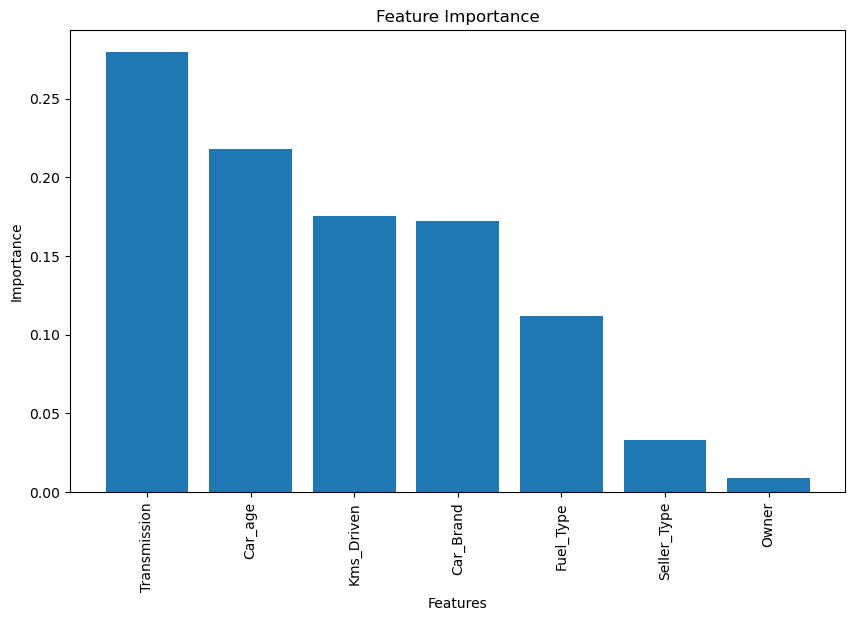

In [2011]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Train the random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train1_x, train1_y)

# Get feature importances from the trained model
importances = model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Get feature names
feature_names = train1_x.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Dummification

In [2012]:
df2 = df.copy()

In [2013]:
df2

,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age,Car_Brand
0,60000,70000,Petrol,Individual,Manual,First Owner,16,Maruti
1,135000,50000,Petrol,Individual,Manual,First Owner,16,Maruti
2,600000,100000,Diesel,Individual,Manual,First Owner,11,Hyundai
3,250000,46000,Petrol,Individual,Manual,First Owner,6,Datsun
4,450000,141000,Diesel,Individual,Manual,Second Owner,9,Honda
...,...,...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner,9,Hyundai
4336,409999,80000,Diesel,Individual,Manual,Second Owner,9,Hyundai
4337,110000,83000,Petrol,Individual,Manual,Second Owner,14,Maruti
4338,865000,90000,Diesel,Individual,Manual,First Owner,7,Hyundai


In [2014]:
import numpy as np

numeric_cols = df2.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df2.select_dtypes(exclude=np.number).columns.tolist()

In [2015]:
numeric_cols

['Selling_Price', 'Kms_Driven', 'Car_age']

In [2016]:
categorical_cols

['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Car_Brand']

In [2017]:
# Numerical and Categorical features
X_cat = df2[categorical_cols]
X_num = df2[numeric_cols]
X_num.drop(['Selling_Price'], axis =1, inplace = True)  
s = df2['Selling_Price']

In [2018]:
#!pip install sklearn
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled)

X_num_scaled.columns = X_num.columns
X_num_scaled

,Kms_Driven,Car_age
0,0.405449,0.800000
1,0.289439,0.800000
2,0.579464,0.466667
3,0.266237,0.133333
4,0.817284,0.333333
...,...,...
4335,0.463454,0.333333
4336,0.463454,0.333333
4337,0.480855,0.666667
4338,0.521459,0.200000


In [2019]:
df60 = pd.concat([X_cat,X_num_scaled,s], axis=1)
df60

,Fuel_Type,Seller_Type,Transmission,Owner,Car_Brand,Kms_Driven,Car_age,Selling_Price
0,Petrol,Individual,Manual,First Owner,Maruti,0.405449,0.800000,60000
1,Petrol,Individual,Manual,First Owner,Maruti,0.289439,0.800000,135000
2,Diesel,Individual,Manual,First Owner,Hyundai,0.579464,0.466667,600000
3,Petrol,Individual,Manual,First Owner,Datsun,0.266237,0.133333,250000
4,Diesel,Individual,Manual,Second Owner,Honda,0.817284,0.333333,450000
...,...,...,...,...,...,...,...,...
4335,Diesel,Individual,Manual,Second Owner,Hyundai,0.463454,0.333333,409999
4336,Diesel,Individual,Manual,Second Owner,Hyundai,0.463454,0.333333,409999
4337,Petrol,Individual,Manual,Second Owner,Maruti,0.480855,0.666667,110000
4338,Diesel,Individual,Manual,First Owner,Hyundai,0.521459,0.200000,865000


In [2020]:
df60=pd.get_dummies(df60)

In [2021]:
df60

,Kms_Driven,Car_age,Selling_Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,...,Car_Brand_Mercedes-Benz,Car_Brand_Mitsubishi,Car_Brand_Nissan,Car_Brand_OpelCorsa,Car_Brand_Renault,Car_Brand_Skoda,Car_Brand_Tata,Car_Brand_Toyota,Car_Brand_Volkswagen,Car_Brand_Volvo
0,0.405449,0.800000,60000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.289439,0.800000,135000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.579464,0.466667,600000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.266237,0.133333,250000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.817284,0.333333,450000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,0.463454,0.333333,409999,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4336,0.463454,0.333333,409999,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4337,0.480855,0.666667,110000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4338,0.521459,0.200000,865000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [2022]:
df60.duplicated().sum()


790

In [2023]:
df60.drop_duplicates(inplace=True)

In [2024]:
df60

,Kms_Driven,Car_age,Selling_Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,...,Car_Brand_Mercedes-Benz,Car_Brand_Mitsubishi,Car_Brand_Nissan,Car_Brand_OpelCorsa,Car_Brand_Renault,Car_Brand_Skoda,Car_Brand_Tata,Car_Brand_Toyota,Car_Brand_Volkswagen,Car_Brand_Volvo
0,0.405449,0.800000,60000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.289439,0.800000,135000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.579464,0.466667,600000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.266237,0.133333,250000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.817284,0.333333,450000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,0.985499,0.466667,600000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4335,0.463454,0.333333,409999,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4337,0.480855,0.666667,110000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4338,0.521459,0.200000,865000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [2025]:
df60.columns

Index(['Kms_Driven', 'Car_age', 'Selling_Price', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Seller_Type_Trustmark Dealer', 'Transmission_Automatic',
       'Transmission_Manual', 'Owner_First Owner',
       'Owner_Fourth & Above Owner', 'Owner_Second Owner',
       'Owner_Test Drive Car', 'Owner_Third Owner', 'Car_Brand_Ambassador',
       'Car_Brand_Audi', 'Car_Brand_BMW', 'Car_Brand_Chevrolet',
       'Car_Brand_Daewoo', 'Car_Brand_Datsun', 'Car_Brand_Fiat',
       'Car_Brand_Force', 'Car_Brand_Ford', 'Car_Brand_Honda',
       'Car_Brand_Hyundai', 'Car_Brand_Isuzu', 'Car_Brand_Jaguar',
       'Car_Brand_Jeep', 'Car_Brand_Kia', 'Car_Brand_Land', 'Car_Brand_MG',
       'Car_Brand_Mahindra', 'Car_Brand_Maruti', 'Car_Brand_Mercedes-Benz',
       'Car_Brand_Mitsubishi', 'Car_Brand_Nissan', 'Car_Brand_OpelCorsa',
       'Car_Brand_Renault', 'Car_Brand_Skoda', 'Car_Bran

# Linear Regression

In [2026]:
from sklearn.model_selection import train_test_split
# Train test split.
train6,test6 = train_test_split(df60,test_size=0.10,random_state=0)
print('shape of training data : ',train6.shape)
print('shape of testing data',test6.shape)

shape of training data :  (3195, 47)
shape of testing data (355, 47)


In [2027]:
##Separating the target and independent variable
train6_x = train6.drop(columns=['Selling_Price'],axis=1)
train6_y = train6['Selling_Price']
test6_x = test6.drop(columns=['Selling_Price'],axis=1)
test6_y = test6['Selling_Price']

In [1852]:
reg=LinearRegression()
reg.fit(train6_x, train6_y)

LinearRegression()

In [1853]:
pred_test=reg.predict(test6_x)


In [2029]:
# MODEL EVALUATION ON TEST DATA
Lin_RMSLE = round(mean_squared_log_error(test6_y, abs(pred_test)), 2)
Lin_R2    = round(r2_score(test6_y, abs(pred_test)), 2)
print('RMSLE is :',Lin_RMSLE)
print('R2 Score is :',Lin_R2 )

RMSLE is : 0.38
R2 Score is : 0.67


In [2031]:
# With important features.
M = df60[['Kms_Driven', 'Car_age','Car_Brand_Ambassador',
       'Car_Brand_Audi', 'Car_Brand_BMW', 'Car_Brand_Chevrolet',
       'Car_Brand_Daewoo', 'Car_Brand_Datsun', 'Car_Brand_Fiat',
       'Car_Brand_Force', 'Car_Brand_Ford', 'Car_Brand_Honda',
       'Car_Brand_Hyundai', 'Car_Brand_Isuzu', 'Car_Brand_Jaguar',
       'Car_Brand_Jeep', 'Car_Brand_Kia', 'Car_Brand_Land', 'Car_Brand_MG',
       'Car_Brand_Mahindra', 'Car_Brand_Maruti', 'Car_Brand_Mercedes-Benz',
       'Car_Brand_Mitsubishi', 'Car_Brand_Nissan', 'Car_Brand_OpelCorsa',
       'Car_Brand_Renault', 'Car_Brand_Skoda', 'Car_Brand_Tata',
       'Car_Brand_Toyota', 'Car_Brand_Volkswagen', 'Car_Brand_Volvo','Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol','Transmission_Automatic',
       'Transmission_Manual']]
n = df60['Selling_Price']

# Let's split the data into training and testing sets
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.10, random_state= 1000)

# Creating a Random Forest Classifier model
model100 = LinearRegression()

# Training the model
model100.fit(M_train, n_train)

# Predict
predict100=model100.predict(M_test)

# Score
Lin_RMSLE_I = round(mean_squared_log_error(n_test,abs(predict100)), 2)
Lin_R2_I    = round(r2_score(n_test,abs(predict100)), 2)
print('RMSLE is :',Lin_RMSLE_I)
print('R2 Score is :',Lin_R2_I )

RMSLE is : 0.33
R2 Score is : 0.69


# Ridge Regression

In [2034]:
ridge = Ridge(alpha=0.05)
ridge.fit(train6_x, train6_y)

Ridge(alpha=0.05)

In [2035]:
pred_test_ridge=ridge.predict(test6_x)
pred_train_ridge=ridge.predict(train6_x)


In [2037]:
# MODEL EVALUATION ON TEST DATA
Ridge_RMSLE = round(mean_squared_log_error(test6_y, abs(pred_test_ridge)), 2)
Ridge_R2    = round(r2_score(test6_y, abs(pred_test_ridge)), 2)
print('RMSLE is :',Ridge_RMSLE)
print('R2 Score is :',Ridge_R2 )

RMSLE is : 0.42
R2 Score is : 0.67


In [2039]:
# MODEL EVALUATION ON TRAIN DATA

print('RMSLE is :',mean_squared_log_error(train6_y, abs(pred_train_ridge)))
print('R2 Score is :',r2_score(train6_y, pred_train_ridge))

RMSLE is : 0.4222470207404716
R2 Score is : 0.6440486454973026


In [2041]:
model200 = Ridge(alpha=0.05)
#model200.fit(x_train,y_train)

# Training the model
model200.fit(M_train, n_train)

# Predict
predict200=model200.predict(M_test)

# Score
Ridge_RMSLE_I = round(mean_squared_log_error(n_test,abs(predict200)), 2)
Ridge_R2_I    = round(r2_score(n_test,abs(predict200)), 2)
print('RMSLE is :',Ridge_RMSLE_I)
print('R2 Score is :',Ridge_R2_I )

RMSLE is : 0.33
R2 Score is : 0.69


# Lasso Regression

In [2043]:
lasso = Lasso(alpha=0.05)
lasso.fit(train6_x,train6_y)
pred_test_lasso=lasso.predict(test6_x)
pred_train_lasso=lasso.predict(train6_x)

In [2044]:
# MODEL EVALUATION ON TEST DATA
Lasso_RMSLE = round(mean_squared_log_error(test6_y, abs(pred_test_lasso)), 2)
Lasso_R2    = round(r2_score(test6_y, abs(pred_test_ridge)), 2)
print('RMSLE is :',Lasso_RMSLE)
print('R2 Score is :',Lasso_R2)

RMSLE is : 0.42
R2 Score is : 0.67


In [2046]:
model300 = Lasso(alpha=0.05)
model300.fit(M_train, n_train)

# Training the model
model300.fit(M_train, n_train)

# Predict
predict300=model300.predict(M_test)

# Score
Lasso_RMSLE_I = round(mean_squared_log_error(n_test,abs(predict300)), 2)
Lasso_R2_I    = round(r2_score(n_test,abs(predict300)), 2)
print('RMSLE is :',Lasso_RMSLE_I)
print('R2 Score is :',Lasso_R2_I )

RMSLE is : 0.33
R2 Score is : 0.69


# Decision tree regressor

In [2048]:
from sklearn.tree import DecisionTreeRegressor


dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(train6_x,train6_y)

dt_regressor.score(test6_x, test6_y)

0.009212055292388444

In [2049]:
dt_regressor.tree_.max_depth

30

In [2070]:
dt_regressor = DecisionTreeRegressor(max_depth=10)
dt_regressor.fit(train6_x,train6_y)
DTR=round(dt_regressor.score(test6_x, test6_y),2)
print(DTR)

0.65


In [2076]:
dt_regressor = DecisionTreeRegressor(max_depth=20)
dt_regressor.fit(M_train, n_train)
DTR_I= round(dt_regressor.score(M_test, n_test),2)
print(DTR_I)

0.7


# Random Forest Regressor

In [1870]:
rf=RandomForestRegressor(n_estimators=100,random_state=15)
rf.fit(train6_x, train6_y)
pred_test_rf= rf.predict(test6_x)

In [2078]:
RFR_RMSLE = round(mean_squared_log_error(test6_y, abs(pred_test_rf)), 2)
RFR_R2    = round(r2_score(test6_y, pred_test_rf), 2)
print('RMSLE is :',RFR_RMSLE)
print('R2 Score is :',RFR_R2)

RMSLE is : 0.16
R2 Score is : 0.77


In [2080]:
# With important features.
G = df60[['Kms_Driven', 'Car_age','Car_Brand_Ambassador',
       'Car_Brand_Audi', 'Car_Brand_BMW', 'Car_Brand_Chevrolet',
       'Car_Brand_Daewoo', 'Car_Brand_Datsun', 'Car_Brand_Fiat',
       'Car_Brand_Force', 'Car_Brand_Ford', 'Car_Brand_Honda',
       'Car_Brand_Hyundai', 'Car_Brand_Isuzu', 'Car_Brand_Jaguar',
       'Car_Brand_Jeep', 'Car_Brand_Kia', 'Car_Brand_Land', 'Car_Brand_MG',
       'Car_Brand_Mahindra', 'Car_Brand_Maruti', 'Car_Brand_Mercedes-Benz',
       'Car_Brand_Mitsubishi', 'Car_Brand_Nissan', 'Car_Brand_OpelCorsa',
       'Car_Brand_Renault', 'Car_Brand_Skoda', 'Car_Brand_Tata',
       'Car_Brand_Toyota', 'Car_Brand_Volkswagen', 'Car_Brand_Volvo','Transmission_Automatic',
       'Transmission_Manual']]
h = df60['Selling_Price']

# Let's split the data into training and testing sets
G_train, G_test, h_train, h_test = train_test_split(G, h, test_size=0.10, random_state= 1000)

model402 = RandomForestRegressor(n_estimators=100,random_state=0)
#model402.fit(G_train, h_train)

# Training the model
model402.fit(G_train, h_train)

# Predict
predict402=model402.predict(G_test)

# Score
RFR_RMSLE_I = round(mean_squared_log_error(h_test,abs(predict402)), 2)
RFR_R2_I    = round(r2_score(h_test,abs(predict402)), 2)
print('RMSLE is :',RFR_RMSLE_I)
print('R2 Score is :',RFR_R2_I  )

RMSLE is : 0.18
R2 Score is : 0.75


In [2111]:
# Using Optuna for hyperparameter tuning.
#!pip install optuna
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Defining the objective function to optimize
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    # Initializing the model with the hyperparameters
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )

    # Fitting the model on the training data
    model.fit(train6_x, train6_y)

    # Predicting on the test data
    predict = model.predict(test6_x)

    # Calculating and returning the accuracy score
    accuracy = r2_score(test6_y,abs(predict))
    return accuracy

# Running the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Let's print the best hyperparameters and their corresponding accuracy
best_params = study.best_params
best_accuracy1 = round(study.best_value,2)
print('Best Hyperparameters:', best_params)
print('Best Accuracy:', best_accuracy1)

[I 2023-06-26 06:07:03,303] A new study created in memory with name: no-name-9f0b529b-d8cb-42f5-9a92-91fed68fc696
[I 2023-06-26 06:07:05,577] Trial 0 finished with value: 0.8049523792538478 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 7}. Best is trial 0 with value: 0.8049523792538478.
[I 2023-06-26 06:07:10,318] Trial 1 finished with value: 0.692739054691356 and parameters: {'n_estimators': 800, 'max_depth': 4, 'min_samples_split': 9}. Best is trial 0 with value: 0.8049523792538478.
[I 2023-06-26 06:07:16,157] Trial 2 finished with value: 0.7337571690572227 and parameters: {'n_estimators': 800, 'max_depth': 6, 'min_samples_split': 2}. Best is trial 0 with value: 0.8049523792538478.
[I 2023-06-26 06:07:21,461] Trial 3 finished with value: 0.7142731380173548 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_samples_split': 2}. Best is trial 0 with value: 0.8049523792538478.
[I 2023-06-26 06:07:27,258] Trial 4 finished with value: 0.752167487977351

[I 2023-06-26 06:10:36,873] Trial 40 finished with value: 0.7380167322534827 and parameters: {'n_estimators': 1000, 'max_depth': 5, 'min_samples_split': 6}. Best is trial 26 with value: 0.8064493956481451.
[I 2023-06-26 06:10:43,459] Trial 41 finished with value: 0.8056264295210498 and parameters: {'n_estimators': 600, 'max_depth': 10, 'min_samples_split': 6}. Best is trial 26 with value: 0.8064493956481451.
[I 2023-06-26 06:10:48,792] Trial 42 finished with value: 0.8008238601332838 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 5}. Best is trial 26 with value: 0.8064493956481451.
[I 2023-06-26 06:10:55,038] Trial 43 finished with value: 0.8040772363461599 and parameters: {'n_estimators': 600, 'max_depth': 10, 'min_samples_split': 7}. Best is trial 26 with value: 0.8064493956481451.
[I 2023-06-26 06:11:01,920] Trial 44 finished with value: 0.7993569260523619 and parameters: {'n_estimators': 700, 'max_depth': 9, 'min_samples_split': 6}. Best is trial 26 wit

[I 2023-06-26 06:13:28,099] Trial 80 finished with value: 0.6870178301875073 and parameters: {'n_estimators': 200, 'max_depth': 4, 'min_samples_split': 8}. Best is trial 71 with value: 0.8081745475197506.
[I 2023-06-26 06:13:31,628] Trial 81 finished with value: 0.8069830485860026 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 6}. Best is trial 71 with value: 0.8081745475197506.
[I 2023-06-26 06:13:33,896] Trial 82 finished with value: 0.8081745475197506 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 6}. Best is trial 71 with value: 0.8081745475197506.
[I 2023-06-26 06:13:36,055] Trial 83 finished with value: 0.8081745475197506 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 6}. Best is trial 71 with value: 0.8081745475197506.
[I 2023-06-26 06:13:37,142] Trial 84 finished with value: 0.8039290362423359 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 6}. Best is trial 71 wit

Best Hyperparameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 6}
Best Accuracy: 0.81


In [2113]:
# Optuna using important features.
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Defining the objective function to optimize
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    # Initializing the model with the hyperparameters
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )

    # Fitting the model on the training data
    model.fit(G_train, h_train)

    # Predicting on the test data
    predict = model.predict(G_test)

    # Calculating and returning the accuracy score
    accuracy = r2_score(h_test,abs(predict))
    return accuracy

# Running the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Let's print the best hyperparameters and their corresponding accuracy
best_params = study.best_params
best_accuracy2 = round(study.best_value,2)
print('Best Hyperparameters:', best_params)
print('Best Accuracy:', best_accuracy2)

[I 2023-06-26 06:15:13,896] A new study created in memory with name: no-name-89675f7d-5376-4ef5-955b-a965b4d36fff
[I 2023-06-26 06:15:17,645] Trial 0 finished with value: 0.7303652888570229 and parameters: {'n_estimators': 500, 'max_depth': 9, 'min_samples_split': 10}. Best is trial 0 with value: 0.7303652888570229.
[I 2023-06-26 06:15:23,474] Trial 1 finished with value: 0.6699135606188865 and parameters: {'n_estimators': 1000, 'max_depth': 6, 'min_samples_split': 4}. Best is trial 0 with value: 0.7303652888570229.
[I 2023-06-26 06:15:27,531] Trial 2 finished with value: 0.6224542600678014 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_samples_split': 9}. Best is trial 0 with value: 0.7303652888570229.
[I 2023-06-26 06:15:32,507] Trial 3 finished with value: 0.6994417108799863 and parameters: {'n_estimators': 800, 'max_depth': 7, 'min_samples_split': 9}. Best is trial 0 with value: 0.7303652888570229.
[I 2023-06-26 06:15:36,846] Trial 4 finished with value: 0.7104188022607

[I 2023-06-26 06:18:46,719] Trial 40 finished with value: 0.7548182668001315 and parameters: {'n_estimators': 700, 'max_depth': 10, 'min_samples_split': 2}. Best is trial 22 with value: 0.7610328281912475.
[I 2023-06-26 06:18:52,850] Trial 41 finished with value: 0.7600636598705345 and parameters: {'n_estimators': 800, 'max_depth': 10, 'min_samples_split': 6}. Best is trial 22 with value: 0.7610328281912475.
[I 2023-06-26 06:18:59,714] Trial 42 finished with value: 0.7600902360731374 and parameters: {'n_estimators': 900, 'max_depth': 10, 'min_samples_split': 6}. Best is trial 22 with value: 0.7610328281912475.
[I 2023-06-26 06:19:06,530] Trial 43 finished with value: 0.7595182548685192 and parameters: {'n_estimators': 900, 'max_depth': 10, 'min_samples_split': 5}. Best is trial 22 with value: 0.7610328281912475.
[I 2023-06-26 06:19:07,307] Trial 44 finished with value: 0.7612650007978881 and parameters: {'n_estimators': 100, 'max_depth': 9, 'min_samples_split': 7}. Best is trial 44 wit

[I 2023-06-26 06:22:47,539] Trial 80 finished with value: 0.760856047218423 and parameters: {'n_estimators': 1000, 'max_depth': 10, 'min_samples_split': 6}. Best is trial 44 with value: 0.7612650007978881.
[I 2023-06-26 06:22:55,151] Trial 81 finished with value: 0.760856047218423 and parameters: {'n_estimators': 1000, 'max_depth': 10, 'min_samples_split': 6}. Best is trial 44 with value: 0.7612650007978881.
[I 2023-06-26 06:23:02,722] Trial 82 finished with value: 0.760856047218423 and parameters: {'n_estimators': 1000, 'max_depth': 10, 'min_samples_split': 6}. Best is trial 44 with value: 0.7612650007978881.
[I 2023-06-26 06:23:10,154] Trial 83 finished with value: 0.760856047218423 and parameters: {'n_estimators': 1000, 'max_depth': 10, 'min_samples_split': 6}. Best is trial 44 with value: 0.7612650007978881.
[I 2023-06-26 06:23:18,498] Trial 84 finished with value: 0.7550637542102606 and parameters: {'n_estimators': 1000, 'max_depth': 10, 'min_samples_split': 7}. Best is trial 44 w

Best Hyperparameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 6}
Best Accuracy: 0.76


# OLS

In [2101]:
# Add a constant term to the independent variables
#X= sm.add_constant(x_train)
X_train_const = sm.add_constant(train6_x)
# Fit the OLS regression model
model9 = sm.OLS(train6_y,X_train_const)
results = model9.fit()

# Print the regression results
print(results.summary())
OLS_r_squared = round(results.rsquared,2)
#print(OLS_r_squared)

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     139.1
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        06:02:11   Log-Likelihood:                -44875.
No. Observations:                3195   AIC:                         8.983e+04
Df Residuals:                    3153   BIC:                         9.009e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [2102]:
residuals = results.resid

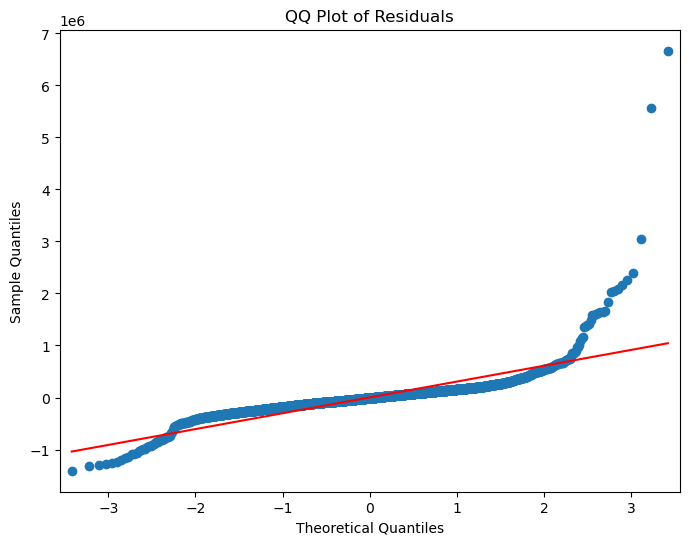

In [2103]:
import matplotlib.pyplot as plt
import statsmodels.graphics.gofplots as smg

# Generate QQ plot
fig, ax = plt.subplots(figsize=(8, 6))
smg.qqplot(residuals, line='s', ax=ax)
plt.title('QQ Plot of Residuals')
plt.show()

In [2104]:
df70 = df60.copy()

In [2105]:
df70

,Kms_Driven,Car_age,Selling_Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,...,Car_Brand_Mercedes-Benz,Car_Brand_Mitsubishi,Car_Brand_Nissan,Car_Brand_OpelCorsa,Car_Brand_Renault,Car_Brand_Skoda,Car_Brand_Tata,Car_Brand_Toyota,Car_Brand_Volkswagen,Car_Brand_Volvo
0,0.405449,0.800000,60000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.289439,0.800000,135000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.579464,0.466667,600000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.266237,0.133333,250000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.817284,0.333333,450000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,0.985499,0.466667,600000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4335,0.463454,0.333333,409999,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4337,0.480855,0.666667,110000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4338,0.521459,0.200000,865000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [2106]:
from sklearn.model_selection import train_test_split
# Train test split.
train7,test7 = train_test_split(df70,test_size=0.10,random_state=0)
print('shape of training data : ',train7.shape)
print('shape of testing data',test7.shape)
##Separating the target and independent variable
train7_x = train7.drop(columns=['Selling_Price'],axis=1)
train7_y = train7['Selling_Price']
test7_x = test7.drop(columns=['Selling_Price'],axis=1)
test7_y = test7['Selling_Price']

shape of training data :  (3195, 47)
shape of testing data (355, 47)


In [2107]:
import scipy.stats as stats
#transformed_data, lambda_value = stats.boxcox(data)
train7_y_t, lambda_ = stats.boxcox(train7_y)
test7_y_t, lambda_ = stats.boxcox(test7_y)

In [2108]:
# Applying OLS post Box cox transformation
X_train_const = sm.add_constant(train7_x)
# Fit the OLS regression model
model9 = sm.OLS(train7_y_t,X_train_const)
results1 = model9.fit()

# Print the regression results
print(results1.summary())
OLS_r_squared_boxcox = round(results1.rsquared,2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     275.4
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        06:02:33   Log-Likelihood:                -1947.2
No. Observations:                3195   AIC:                             3978.
Df Residuals:                    3153   BIC:                             4233.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

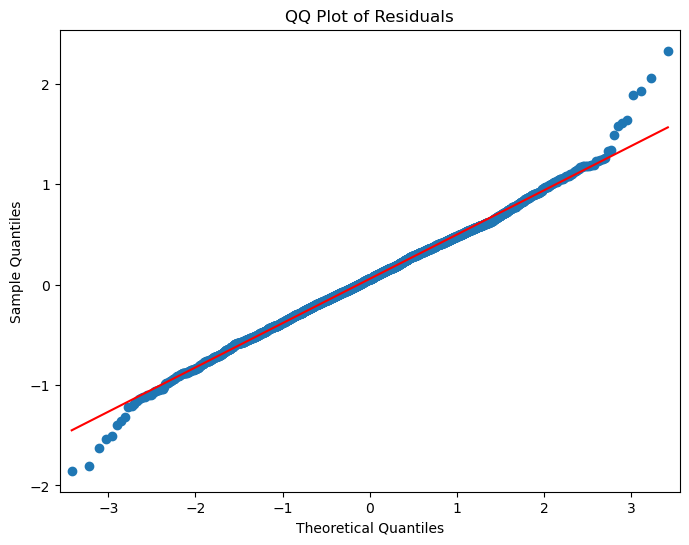

In [2109]:
import matplotlib.pyplot as plt
import statsmodels.graphics.gofplots as smg
residuals1 = results1.resid
# Generate QQ plot
fig, ax = plt.subplots(figsize=(8, 6))
smg.qqplot(residuals1, line='s', ax=ax)
plt.title('QQ Plot of Residuals')
plt.show()

In [2114]:
from prettytable import PrettyTable
table = PrettyTable(['SL NO',"MODEL_NAME", "R2 Score","RMLSE","Score_applicable"])
table.add_row(['1','Linear Regression using all features',Lin_R2,Lin_RMSLE,'NA'])
table.add_row(['2','Linear Regression using imp features',Lin_R2_I,Lin_RMSLE_I,'NA'])
table.add_row(['3','Ridge Regression using all features',Ridge_R2 ,Ridge_RMSLE,'NA'])
table.add_row(['4','Ridge Regression using imp features',Ridge_R2_I,Ridge_RMSLE_I,'NA'])
table.add_row(['5','Lasso Regression using all features',Lasso_R2  ,Lasso_RMSLE,'NA'])
table.add_row(['6','Lasso Regression using imp features',Lasso_R2_I,Lasso_RMSLE_I,'NA'])
table.add_row(['7','Decision tree regressor using all features','NA','NA',DTR])
table.add_row(['8','Decision tree regressor using imp features','NA','NA',DTR_I])
table.add_row(['9','Random forest regressor using all features',RFR_R2  ,RFR_RMSLE,'NA'])
table.add_row(['10','Random forest regressor using imp features',RFR_R2_I ,RFR_RMSLE_I,'NA'])
table.add_row(['11','Random forest regressor using Optuna & all features','NA','NA',best_accuracy1])
table.add_row(['12','Random forest regressor using Optuna & imp features','NA','NA',best_accuracy2])
table.add_row(['13','OLS without Box-cox ',OLS_r_squared,'NA','NA'])
table.add_row(['14','OLS without Box-cox ',OLS_r_squared_boxcox,'NA','NA'])
print(table)

+-------+-----------------------------------------------------+----------+-------+------------------+
| SL NO |                      MODEL_NAME                     | R2 Score | RMLSE | Score_applicable |
+-------+-----------------------------------------------------+----------+-------+------------------+
|   1   |         Linear Regression using all features        |   0.67   |  0.38 |        NA        |
|   2   |         Linear Regression using imp features        |   0.69   |  0.33 |        NA        |
|   3   |         Ridge Regression using all features         |   0.67   |  0.42 |        NA        |
|   4   |         Ridge Regression using imp features         |   0.69   |  0.33 |        NA        |
|   5   |         Lasso Regression using all features         |   0.67   |  0.42 |        NA        |
|   6   |         Lasso Regression using imp features         |   0.69   |  0.33 |        NA        |
|   7   |      Decision tree regressor using all features     |    NA    |   NA  |

# Our analysis indicates that the Random Forest regressor, incorporating all features and leveraging Optuna, produces highly favorable results. With an accuracy of 0.81, it excels in accurately predicting the resale price of cars. This underscores its effectiveness in providing precise estimates for car valuation.